In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
df = pd.read_csv("/Users/tueje15/Documents/jupyter-notebooks/@datasets/kc_house_data.csv")
df
col_to_drop = ['id', 'zipcode', 'view', 'waterfront', 'condition', 'grade', 'yr_renovated', 'sqft_living15', 'sqft_lot15']
df.drop(col_to_drop,axis = 1, inplace = True)
df.dropna(axis=0,how='any')
df['date'] = pd.to_datetime(df['date'])
df['price'] = df['price'] / 10000 # to return a price column that makes more visual sense
df2 = df[df['bathrooms'] < 2] # new dataframe returns properties with 2 or less bathrooms
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long
0,2014-10-13,22.1900,3,1.00,1180,5650,1.0,1180.0,0,1955,47.5112,-122.257
1,2014-12-09,53.8000,3,2.25,2570,7242,2.0,2170.0,400,1951,47.7210,-122.319
2,2015-02-25,18.0000,2,1.00,770,10000,1.0,770.0,0,1933,47.7379,-122.233
3,2014-12-09,60.4000,4,3.00,1960,5000,1.0,1050.0,910,1965,47.5208,-122.393
4,2015-02-18,51.0000,3,2.00,1680,8080,1.0,1680.0,0,1987,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,36.0000,3,2.50,1530,1131,3.0,1530.0,0,2009,47.6993,-122.346
21609,2015-02-23,40.0000,4,2.50,2310,5813,2.0,2310.0,0,2014,47.5107,-122.362
21610,2014-06-23,40.2101,2,0.75,1020,1350,2.0,1020.0,0,2009,47.5944,-122.299
21611,2015-01-16,40.0000,3,2.50,1600,2388,2.0,1600.0,0,2004,47.5345,-122.069


In [18]:
df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long
0,2014-10-13,22.1900,3,1.00,1180,5650,1.0,1180.0,0,1955,47.5112,-122.257
2,2015-02-25,18.0000,2,1.00,770,10000,1.0,770.0,0,1933,47.7379,-122.233
7,2015-01-15,29.1850,3,1.50,1060,9711,1.0,1060.0,0,1963,47.4095,-122.315
8,2015-04-15,22.9500,3,1.00,1780,7470,1.0,1050.0,730,1960,47.5123,-122.337
11,2014-05-27,46.8000,2,1.00,1160,6000,1.0,860.0,300,1942,47.6900,-122.292
...,...,...,...,...,...,...,...,...,...,...,...,...
21583,2014-06-10,39.9950,2,1.00,710,1157,2.0,710.0,0,1943,47.6413,-122.329
21588,2014-11-13,41.4500,2,1.50,1210,1278,2.0,1020.0,190,2007,47.6756,-122.375
21602,2014-06-26,22.4000,3,1.75,1500,11968,1.0,1500.0,0,2014,47.3095,-122.002
21610,2014-06-23,40.2101,2,0.75,1020,1350,2.0,1020.0,0,2009,47.5944,-122.299


In [14]:
print(df.corr())

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
sqft_above     0.605567  0.477616   0.685363     0.876644  0.183511  0.523899   
sqft_basement  0.323816  0.303093   0.283770     0.435043  0.015286 -0.245705   
yr_built       0.054012  0.154178   0.506019     0.318049  0.053080  0.489319   
lat            0.307003 -0.008931   0.024573     0.052529 -0.085683  0.049614   
long           0.021626  0.129473   0.223042     0.240223  0.229521  0.125419   

               sqft_above  

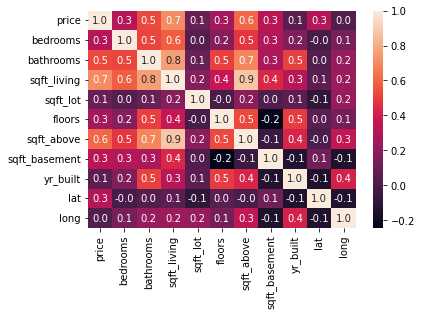

In [19]:
# the idea would be to also do this heatmap with df2 to see what difference it makes to correlation
sns.heatmap(df.corr(), annot = True, fmt = '.1f') 
plt.show()

Text(0.5, 1.0, 'Price vs square foot')

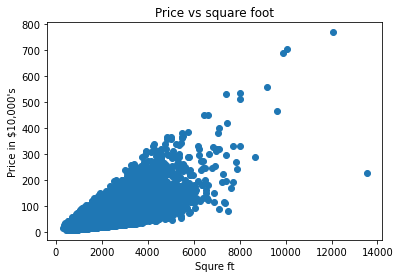

In [20]:
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('Squre ft')
plt.ylabel("Price in $10,000's")
plt.title('Price vs square foot')

In [ ]:
# more calculations forthcoming!!!